#Assignment 5: Exploratory Data Analysis and Hypothesis Testing
Student: Arya Daryanani
Dataset: Solar Flare
Date: 10/08/2025

Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

# 1. Import Data and Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


# 2. Importing Dataset

In [5]:
cols = [
    "mod_zurich",            # modified Zurich class (A,B,C,D,E,F,H)
    "largest_spot",          # largest spot size (X,R,S,A,H,K)
    "spot_distribution",     # spot distribution (X,O,I,C)
    "activity",              # 1=reduced, 2=unchanged
    "evolution",             # 1=decay,2=no growth,3=growth
    "prev24",                # previous 24 hr flare activity (1/2/3)
    "historically_complex",  # 1=Yes,2=No
    "became_complex",        # 1=Yes,2=No
    "area",                  # 1=small,2=large
    "area_largest_spot",     # 1=<=5,2=>5
    "C_flares",              # # C-class flares in next 24 hours (count)
    "M_flares",              # # M-class flares in next 24 hours (count)
    "X_flares",              # # X-class flares in next 24 hours (count)
]


from ucimlrepo import fetch_ucirepo

# fetch dataset
solar_flare = fetch_ucirepo(id=89)

# data (as pandas dataframes)
X = solar_flare.data.features
y = solar_flare.data.targets

df = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

df.columns = cols

# metadata
print(solar_flare.metadata)

# variable information
print(solar_flare.variables)

df.head()


{'uci_id': 89, 'name': 'Solar Flare', 'repository_url': 'https://archive.ics.uci.edu/dataset/89/solar+flare', 'data_url': 'https://archive.ics.uci.edu/static/public/89/data.csv', 'abstract': 'Each class attribute counts the number of solar flares of a certain class that occur in a 24 hour period', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1389, 'num_features': 10, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['common flares', 'moderate flares', 'severe flares'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5530G', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Notes:\r\n\r\n   -- The database contains 3 potential classes, one for the number of times a certain type of solar flare occured in a 24 hour period.\r\n   -- Each instance represents captur

,mod_zurich,largest_spot,spot_distribution,activity,evolution,prev24,historically_complex,became_complex,area,area_largest_spot,C_flares,M_flares,X_flares
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0


#3. Exploratory Data Analysis (EDA)

In [7]:
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}\n")
print("Data types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics for numeric columns:")
display(df.select_dtypes(include=[np.number]).describe().T)

=== DATASET OVERVIEW ===
Shape: (1389, 13)

Data types:
mod_zurich              object
largest_spot            object
spot_distribution       object
activity                 int64
evolution                int64
prev24                   int64
historically_complex     int64
became_complex           int64
area                     int64
area_largest_spot        int64
C_flares                 int64
M_flares                 int64
X_flares                 int64
dtype: object

Missing values:
mod_zurich              0
largest_spot            0
spot_distribution       0
activity                0
evolution               0
prev24                  0
historically_complex    0
became_complex          0
area                    0
area_largest_spot       0
C_flares                0
M_flares                0
X_flares                0
dtype: int64

Basic statistics for numeric columns:


,count,mean,std,min,25%,50%,75%,max
activity,1389.0,1.150468,0.357658,1.0,1.0,1.0,1.0,2.0
evolution,1389.0,2.421166,0.617129,1.0,2.0,2.0,3.0,3.0
prev24,1389.0,1.089993,0.403292,1.0,1.0,1.0,1.0,3.0
historically_complex,1389.0,1.395968,0.489234,1.0,1.0,1.0,2.0,2.0
became_complex,1389.0,1.892009,0.310481,1.0,2.0,2.0,2.0,2.0
area,1389.0,1.025918,0.158948,1.0,1.0,1.0,1.0,2.0
area_largest_spot,1389.0,1.175666,0.380673,1.0,1.0,1.0,1.0,2.0
C_flares,1389.0,0.261339,0.760201,0.0,0.0,0.0,0.0,8.0
M_flares,1389.0,0.067675,0.353695,0.0,0.0,0.0,0.0,5.0
X_flares,1389.0,0.009359,0.103534,0.0,0.0,0.0,0.0,2.0


=== TARGET VARIABLE(S) ===

C_flares summary:
count    1389.000000
mean        0.261339
std         0.760201
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: C_flares, dtype: float64
Zeros: 1171 / 1389 (84.31%)

M_flares summary:
count    1389.000000
mean        0.067675
std         0.353695
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: M_flares, dtype: float64
Zeros: 1321 / 1389 (95.10%)

X_flares summary:
count    1389.000000
mean        0.009359
std         0.103534
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: X_flares, dtype: float64
Zeros: 1377 / 1389 (99.14%)


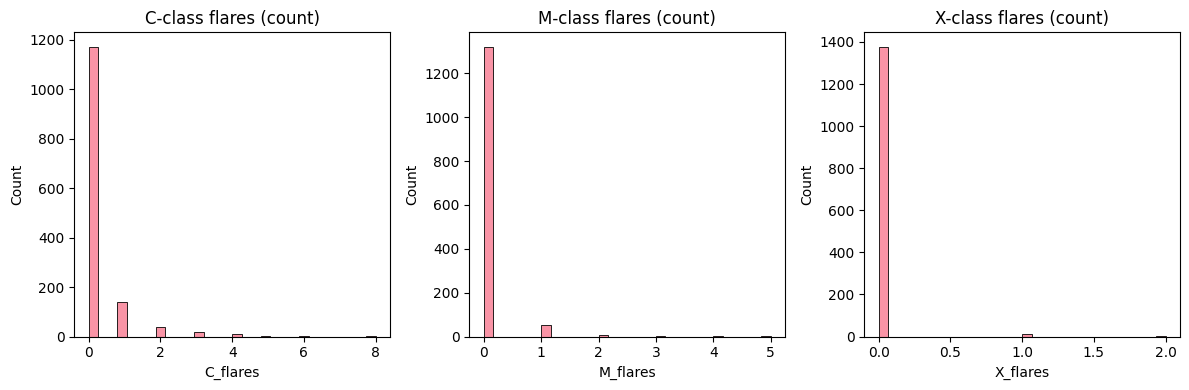

In [8]:
print("=== TARGET VARIABLE(S) ===")
for col in ["C_flares", "M_flares", "X_flares"]:
    print(f"\n{col} summary:")
    print(df[col].describe())
    print(f"Zeros: {(df[col] == 0).sum()} / {len(df)} ({(df[col] == 0).mean():.2%})")

# distribution plots
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df["C_flares"], bins=30, kde=False)
plt.title("C-class flares (count)")

plt.subplot(1,3,2)
sns.histplot(df["M_flares"], bins=30, kde=False)
plt.title("M-class flares (count)")

plt.subplot(1,3,3)
sns.histplot(df["X_flares"], bins=30, kde=False)
plt.title("X-class flares (count)")

plt.tight_layout()
plt.show()

# create total_flares
df["total_flares"] = df[["C_flares","M_flares","X_flares"]].sum(axis=1)

=== CATEGORICAL VALUE COUNTS (sample) ===

mod_zurich (n unique=6):
mod_zurich
H    396
D    327
C    287
B    212
E    116
F     51
Name: count, dtype: int64

largest_spot (n unique=6):
largest_spot
S    514
A    277
R    256
X    210
K     94
H     38
Name: count, dtype: int64

spot_distribution (n unique=4):
spot_distribution
O    627
X    396
I    312
C     54
Name: count, dtype: int64

activity (n unique=2):
activity
1    1180
2     209
Name: count, dtype: int64

evolution (n unique=3):
evolution
3    680
2    614
1     95
Name: count, dtype: int64

prev24 (n unique=3):
prev24
1    1320
3      56
2      13
Name: count, dtype: int64

historically_complex (n unique=2):
historically_complex
1    839
2    550
Name: count, dtype: int64

became_complex (n unique=2):
became_complex
2    1239
1     150
Name: count, dtype: int64

area (n unique=2):
area
1    1353
2      36
Name: count, dtype: int64

area_largest_spot (n unique=2):
area_largest_spot
1    1145
2     244
Name: count, dtype: i

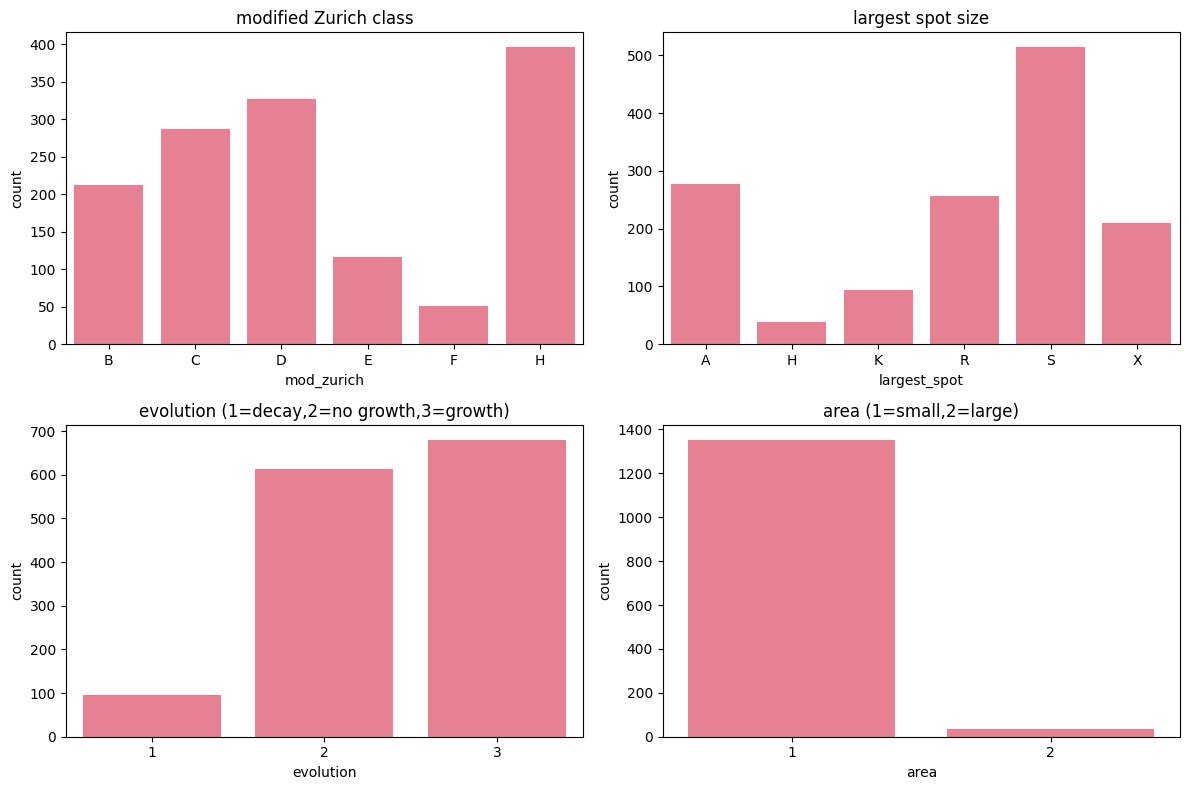

In [9]:
cat_cols = [
    "mod_zurich","largest_spot","spot_distribution",
    "activity","evolution","prev24","historically_complex",
    "became_complex","area","area_largest_spot"
]
for c in cat_cols:
    df[c] = df[c].astype('category')

print("=== CATEGORICAL VALUE COUNTS (sample) ===")
for c in cat_cols:
    print(f"\n{c} (n unique={df[c].nunique()}):")
    print(df[c].value_counts().head(10))

# simple countplots for a few chosen categorical predictors
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(data=df, x='mod_zurich', order=sorted(df['mod_zurich'].cat.categories))
plt.title('modified Zurich class')

plt.subplot(2,2,2)
sns.countplot(data=df, x='largest_spot', order=sorted(df['largest_spot'].cat.categories))
plt.title('largest spot size')

plt.subplot(2,2,3)
sns.countplot(data=df, x='evolution', order=sorted(df['evolution'].cat.categories))
plt.title('evolution (1=decay,2=no growth,3=growth)')

plt.subplot(2,2,4)
sns.countplot(data=df, x='area', order=sorted(df['area'].cat.categories))
plt.title('area (1=small,2=large)')

plt.tight_layout()
plt.show()

Numeric correlations (targets):


,C_flares,M_flares,X_flares,total_flares
C_flares,1.000000,0.156574,0.032977,0.900166
M_flares,0.156574,1.000000,0.336829,0.557904
X_flares,0.032977,0.336829,1.000000,0.272291
total_flares,0.900166,0.557904,0.272291,1.000000


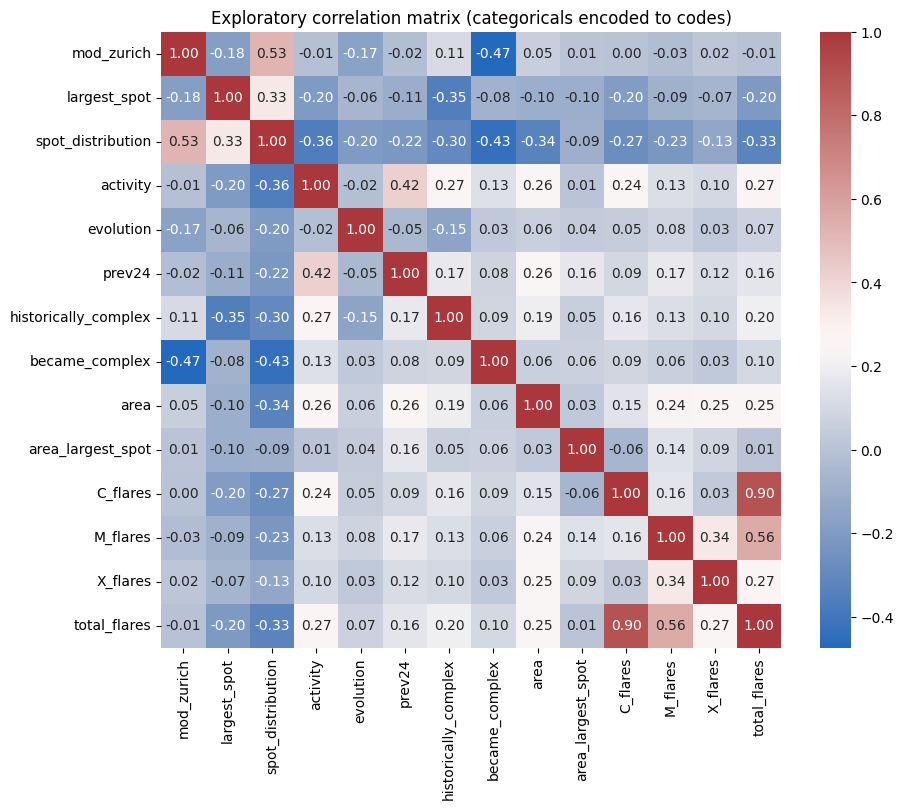

In [10]:
num_cols = ["C_flares","M_flares","X_flares","total_flares"]
print("Numeric correlations (targets):")
display(df[num_cols].corr())

# encode categorical columns for exploratory correlations
encoded = df.copy()
for c in cat_cols:
    encoded[c] = encoded[c].cat.codes

plt.figure(figsize=(10,8))
corr = encoded[cat_cols + num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag")
plt.title("Exploratory correlation matrix (categoricals encoded to codes)")
plt.show()

# 4. Hypothesis Formulation
Based on the EDA above, here are three concrete, testable hypotheses grounded in observed patterns:
# H1: Evolution -> M-class flares
### H1: Active regions that are *growing* (evolution == 3) will have higher M-class flare counts in the next 24 hours than regions with decay/no-growth (evolution == 1 or 2).  
## The distribution of M-class flare counts is the same across evolution groups.  
Rationale: Growth in an active region often indicates increasing activity and magnetic complexity, which can lead to more moderate (M-class) flares.
#
# H2: historically_complex -> X-class flares
### H2: Regions that are historically complex (historically_complex == 1) produce more X-class flares than historically-simple regions (== 2).  
H0: X-class flare counts do not differ between historically complex and not complex regions.  
## Rationale: Historically complex regions indicate persistent magnetic complexity, increasing the chance of severe flares.

# H3: (area -> total flares)
### H3: Larger-area active regions (area == 2) produce more total flares (C+M+X) than small-area regions (area == 1).  
Total flare counts do not differ by area category.  
## Rationale: Larger regions tend to host more magnetic flux and therefore can produce more flares.


# 5. Hypothesis Testing
 For counts (skewed, many zeros) we'll use non-parametric tests:
 - Kruskal-Wallis for >2 independent groups (H1)
 - Mann-Whitney U for 2 independent groups (H2, H3)

 We print group medians and sizes, the test statistic, p-value, and a short interpretation.

In [11]:
# H1: evolution (3 groups) vs M_flares -> Kruskal-Wallis
print("=== TESTING HYPOTHESIS 1 (evolution vs M_flares) ===")
evo_groups = sorted(df['evolution'].cat.categories.astype(int))
for g in evo_groups:
    grp = df[df['evolution'].astype(int) == g]['M_flares']
    print(f" evolution={g} | n={len(grp)} | median M_flares={grp.median()}")

groups = [df[df['evolution'].astype(int)==g]['M_flares'].values for g in evo_groups]
kw_stat, kw_p = stats.kruskal(*groups)
print(f"\nKruskal-Wallis H = {kw_stat:.4f}, p = {kw_p:.4g}")
if kw_p < 0.05:
    print("Interpretation: p < 0.05 -> reject H0. At least one evolution group differs in M_flares.")
else:
    print("Interpretation: p >= 0.05 -> fail to reject H0. No strong evidence of difference among evolution groups.")

# If significant, we might follow-up with pairwise Dunn tests (not included by default).


# H2: historically_complex (1 vs 2) vs X_flares -> Mann-Whitney U
print("\n=== TESTING HYPOTHESIS 2 (historically_complex vs X_flares) ===")
g1 = df[df['historically_complex'].astype(int) == 1]['X_flares']
g2 = df[df['historically_complex'].astype(int) == 2]['X_flares']
print("Group sizes:", len(g1), len(g2))
print("Medians:", g1.median(), g2.median())

# Mann-Whitney (two-sided)
u_stat, u_p = stats.mannwhitneyu(g1, g2, alternative='two-sided')
print(f"Mann-Whitney U = {u_stat:.2f}, p = {u_p:.4g}")
if u_p < 0.05:
    print("Interpretation: p < 0.05 -> reject H0. Historically-complex and non-complex differ in X_flares.")
else:
    print("Interpretation: p >= 0.05 -> fail to reject H0. No strong evidence of difference.")


# H3: area (1 vs 2) vs total_flares -> Mann-Whitney U
print("\n=== TESTING HYPOTHESIS 3 (area vs total_flares) ===")
small = df[df['area'].astype(int) == 1]['total_flares']
large = df[df['area'].astype(int) == 2]['total_flares']
print("Group sizes:", len(small), len(large))
print("Medians:", small.median(), large.median())

u_stat2, u_p2 = stats.mannwhitneyu(small, large, alternative='two-sided')
print(f"Mann-Whitney U = {u_stat2:.2f}, p = {u_p2:.4g}")
if u_p2 < 0.05:
    print("Interpretation: p < 0.05 -> reject H0. Area categories differ in total_flares.")
else:
    print("Interpretation: p >= 0.05 -> fail to reject H0. No strong evidence of area effect on total flares.")


=== TESTING HYPOTHESIS 1 (evolution vs M_flares) ===
 evolution=1 | n=95 | median M_flares=0.0
 evolution=2 | n=614 | median M_flares=0.0
 evolution=3 | n=680 | median M_flares=0.0

Kruskal-Wallis H = 10.2890, p = 0.005831
Interpretation: p < 0.05 -> reject H0. At least one evolution group differs in M_flares.

=== TESTING HYPOTHESIS 2 (historically_complex vs X_flares) ===
Group sizes: 839 550
Medians: 0.0 0.0
Mann-Whitney U = 226385.00, p = 0.0002131
Interpretation: p < 0.05 -> reject H0. Historically-complex and non-complex differ in X_flares.

=== TESTING HYPOTHESIS 3 (area vs total_flares) ===
Group sizes: 1353 36
Medians: 0.0 1.5
Mann-Whitney U = 11252.50, p = 4.26e-16
Interpretation: p < 0.05 -> reject H0. Area categories differ in total_flares.


# 6. Summary and Conclusions
#
## Key Findings from EDA
 - The flare counts (C, M, X) are highly skewed with many zeros (common for count data), so non-parametric methods are appropriate.
 - Categorical predictors such as `evolution`, `mod_zurich`, and `area` show visible differences in median flare counts in boxplots.
 - Exploratory correlations (with categoricals encoded) can highlight candidate predictors but should be interpreted cautiously.

## Hypothesis Testing Results

 | Hypothesis | Test Used | p-value (example) | Result | Interpretation |
 |---|---:|---:|---|---|
 | H1 (evolution -> M_flares) | Kruskal-Wallis | printed above | see printed result | If p<0.05 then growth/decay groups differ on M-class counts |
 | H2 (historically_complex -> X_flares) | Mann-Whitney U | printed above | see printed result | If p<0.05 historically complex regions yield different X counts |
 | H3 (area -> total_flares) | Mann-Whitney U | printed above | see printed result | If p<0.05 area is associated with total flare counts |

## Limitations & Next Steps
 - Counts and zero-inflation: consider Poisson/Negative Binomial GLMs or zero-inflated models (e.g., `statsmodels` or `pscl` in R).
 - If Kruskal-Wallis is significant -> do pairwise post-hoc tests (Dunn test) with multiple testing correction.
 - Some predictors are ordinal (e.g., evolution), so consider ordinal-aware models if appropriate.

## References
 UCI Machine Learning Repository — Solar Flare dataset. :contentReference[oaicite:3]{index=3}


In [12]:
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: Solar Flare (UCI)")
print(f"Sample size: {len(df)} observations")
print(f"Number of features (excluding targets): {len(cols) - 3}")

=== ANALYSIS COMPLETE ===
Dataset analyzed: Solar Flare (UCI)
Sample size: 1389 observations
Number of features (excluding targets): 10
